In [41]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import seaborn as sns
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import pulp


# UFLP

In [372]:
dfvalores = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')
inm = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\1. Estaciones INM\\inm_gdp.csv')
sc = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\2. SC Instituciones\\Facility_Directory.csv')
mun_shp = gpd.read_file("C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk1.shp")


In [258]:
dfvalores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   nommun                         389 non-null    object 
 1   estado                         389 non-null    object 
 2   region                         389 non-null    object 
 3   id_poligon                     389 non-null    object 
 4   codigo_uni                     389 non-null    object 
 5   eventos                        374 non-null    float64
 6   inm_30km                       389 non-null    int64  
 7   inm_in_gri                     389 non-null    int64  
 8   inm_in_est                     389 non-null    int64  
 9   eventos_ed                     389 non-null    int64  
 10  eventos_gr                     389 non-null    int64  
 11  sc_30km                        389 non-null    int64  
 12  promedio_s                     389 non-null    flo

In [143]:
# Assuming inm is your original DataFrame with 'latitud' and 'longitud' columns
# Create a GeoDataFrame
inm['geometry'] = inm.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)
gdf_inm = gpd.GeoDataFrame(inm, geometry='geometry')

# Set the CRS to EPSG:4326
gdf_inm.set_crs(epsg=4326, inplace=True)

# Verify the result
#print(gdf_inm)


,Unnamed: 0,name,tipo,sub_tipo,latitud,longitud,ciudad,estado,id_poligon,region,geometry
0,0,Acayucan Estacion Migratoria,INM,Estacion Migratoria INM,18.001851,-94.921076,Acayucan,Veracruz,PG1378,Golfo,POINT (-94.92108 18.00185)
1,1,Agua Prieta Estacion Provisional,INM,Estacion Migratoria INM,31.332947,-109.560374,Agua Prieta,Sonora,PG578,Pacifico,POINT (-109.56037 31.33295)
2,2,Aguascalientes Estacion Migratoria,INM,Estacion Migratoria INM,21.929551,-102.320223,Aguascalientes,Aguascalientes,PG994,Centro,POINT (-102.32022 21.92955)
3,3,Campeche Estacion Provisional,INM,Estacion Migratoria INM,19.845660,-90.539741,Campeche,Campeche,PG1654,Sur,POINT (-90.53974 19.84566)
4,4,Centro de Atencion Integral al Trafico Fronter...,INM,Centro de Atencion Integral,16.149934,-92.072111,La Trinitaria,Chiapas,PG1531,Sur,POINT (-92.07211 16.14993)
5,5,Centro de Atencion Integral al Transito Fronte...,INM,Centro de Atencion Integral,15.162749,-92.532987,Salto de Agua,Chiapas,PG1530,Sur,POINT (-92.53299 15.16275)
6,6,Chetumal Estacion Migratoria,INM,Estacion Migratoria INM,18.526295,-88.283332,Chetumal,Quintana Roo,PG1769,Sur,POINT (-88.28333 18.52630)
7,7,Chihuahua Estacion Migratoria,INM,Estacion Migratoria INM,28.642257,-106.084403,Chihuahua,Chihuahua,PG769,Centro,POINT (-106.08440 28.64226)
8,8,Ciudad Cuauhtemoc Estacion Provisional,INM,Estacion Migratoria INM,15.667668,-92.002344,Ciudad Cuauhtemoc,Chiapas,PG1531,Sur,POINT (-92.00234 15.66767)
9,9,Ciudad del Carmen Estacion Provisional,INM,Estacion Migratoria INM,18.642626,-91.823607,Ciudad del Carmen,Campeche,PG1574,Sur,POINT (-91.82361 18.64263)


In [144]:
gdf_inm.head(1)

,Unnamed: 0,name,tipo,sub_tipo,latitud,longitud,ciudad,estado,id_poligon,region,geometry
0,0,Acayucan Estacion Migratoria,INM,Estacion Migratoria INM,18.001851,-94.921076,Acayucan,Veracruz,PG1378,Golfo,POINT (-94.92108 18.00185)


In [9]:
mun_shp.head(1)

,nommun,cvemun,nomedo,area,R1,R2,R3,R4,R4pt,region,sum_R1_R2_,geometry
0,"Aguascalientes, Aguascalientes",1001,Aguascalientes,1168.762384,0.360084,0.372695,0.117251,0.662296,0.000458,Centro,0.85003,"POLYGON ((-11370403.590 2520317.662, -11368883..."


### subdfs

In [188]:
sub_dfval = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\df_valores.csv')
#gdf_inm.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\inm.csv')

In [189]:
# Sort cities by demand (eventos) in descending order
sub_dfval = sub_dfval.sort_values(by='eventos', ascending=False).reset_index(drop=True)
# Convert 'geometry_wkt' column from WKT to geometry
sub_dfval['geometry'] = sub_dfval['geometry'].apply(wkt.loads)

# Create GeoDataFrames if not already
sub_dfval = gpd.GeoDataFrame(sub_dfval, geometry='geometry')
#facilities = gpd.GeoDataFrame(facilities, geometry='geometry', crs=sub_dfval.crs)

In [190]:
# Define a function to create a circular buffer around each city centroid
def create_buffer(geom, radius_km):
    return geom.buffer(radius_km / 110.574)  # Conversion from km to degrees

# Assuming sub_dfval is already loaded with the required columns 'geometry' and 'eventos'
# Create a 30km buffer around each city centroid
sub_dfval['buffer'] = sub_dfval['geometry'].apply(create_buffer, radius_km=30)

In [232]:
sub_dfval = sub_dfval.sort_values(by='eventos', ascending=False).reset_index(drop=True)

In [234]:
sub_dfval.head()

,Unnamed: 0,nommun,cvemun,estado,region,id_poligon,eventos,inm_30km,sc_30km,geometry,buffer,fac_30kopt57,fac_30kopt67,fac_30kopt77,fac_30kopt87,fac_30kopt97,fac_30kopt107,fac_30kopt117,fac_30kopt127
0,250,"Mazatlan, Sinaloa",28010.0,Sinaloa,Pacifico,PG761,976.0,1,4,POINT (-106.42084 23.20358),"POLYGON ((-106.14953 23.20358, -106.15083 23.1...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,382,"Merida, Yucatan",NaN,Yucatan,Sur,PG1694,930.0,1,7,POINT (-89.62374 20.96708),"POLYGON ((-89.35243 20.96708, -89.35374 20.940...",0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,71,"Saltillo, Coahuila",25012.0,Coahuila,Centro,PG1077,925.0,1,64,POINT (-100.99275 25.42304),"POLYGON ((-100.72144 25.42304, -100.72275 25.3...",0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,285,"Altamira, Tamaulipas",26029.0,Tamaulipas,Golfo,PG1228,873.0,1,5,POINT (-97.93630 22.39216),"POLYGON ((-97.66499 22.39216, -97.66629 22.365...",0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,239,"Queretaro, Queretaro",31050.0,Queretaro,Centro,PG1109,871.0,0,37,POINT (-100.39022 20.59277),"POLYGON ((-100.11891 20.59277, -100.12022 20.5...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
import pandas as pd

# Assuming dfvalores is your original DataFrame
# List of columns to include in the sub-DataFrame
columns_to_include = ['nommun', 'cvemun', 'estado', 'region', 'id_poligon', 'eventos', 'sc_30km']

# Create the sub-DataFrame by selecting the columns
#sub_df_sc = dfvalores[columns_to_include]



In [54]:
sub_dfval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nommun        389 non-null    object 
 1   cvemun        294 non-null    float64
 2   estado        389 non-null    object 
 3   region        389 non-null    object 
 4   id_poligon    389 non-null    object 
 5   eventos       374 non-null    float64
 6   inm_30km      389 non-null    int64  
 7   sc_30km       389 non-null    int64  
 8   geometry      389 non-null    object 
 9   geometry_wkt  389 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.5+ KB


#### methodologies

In [45]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pulp
import matplotlib.pyplot as plt


#### scenario a: inm

to begin now i want to do the UFLP excerse to get a sintetic optimal distribution of the original size of Fa wich is 57.

Meaning that we have to reproduce the location of 57 points, with their coordinates, based on this criteria:

since in my case every cite of transit has a demand D, that varies accordingly, and it represents how much its needed but also thats gonna be topped depending on other points nearby.

for example in scenario a: the criteria would look like this...
 1) the 57 new locations are going to be assigned to the most needed first, meaning that locations with the most demand (Di) should be prioritized, but assignations are gonna be capped to just one facility for each transit city or node (i). unless [this is very important] the algorithm assigns a Facility To a diferent node (i) and it happens that this facility F also intersect with the 30km radius circle of a node i that was already satisfied.

2) assignations should be made in a way that they try to satisfy locations with most Di, but at the same time try and intersect with other nearby locations in the range, also trying to cover as much D as possible (or as many cities as they can, which would be the same).

    -we have 389 city nodes


   experiment 1
   -Original Fa is 57 facilities


    experiment  and so,
   -facilities increase in 1 for each experiment, until every city is covered using as less facilities as possible.
   


In this exercise, we'll prioritize placing the facilities in the most needed areas based on the demand 
𝐷𝑖
and ensure that each facility can cover as much demand as possible within the 30km range.

To solve the Uncapacitated Facility Location Problem (UFLP) with the given criteria, we can follow these steps:

Define the problem: Formulate the UFLP as a mathematical optimization problem.
Set up the data: Define the demand for each transit city and create the necessary circular polygons to determine intersections.
Formulate the model: Use a linear programming solver to define the decision variables, objective function, and constraints.
Solve the model: Use a solver to find the optimal solution.

In this section, we implement a greedy algorithm to solve the Uncapacitated Facility Location Problem (UFLP) for placing 57 facilities optimally based on demand. Each city (node) in the dataset has a centroid and a demand value (D). The goal is to place facilities to cover as much demand as possible while ensuring that facilities can serve multiple nearby cities within a 30km radius.

In [363]:
import os

# Ruta base donde se crearán las carpetas
base_path = r'C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP'

# Lista de números para las carpetas
folder_numbers = range(67, 128, 10)  # 67, 77, ..., 127

# Crear cada carpeta
for number in folder_numbers:
    folder_name = f"{number} opt"
    folder_path = os.path.join(base_path, folder_name)
    
    # Crea la carpeta si no existe
    os.makedirs(folder_path, exist_ok=True)
    print(f"Creada carpeta: {folder_path}")


Creada carpeta: C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP\67 opt
Creada carpeta: C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP\77 opt
Creada carpeta: C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP\87 opt
Creada carpeta: C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP\97 opt
Creada carpeta: C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP\107 opt
Creada carpeta: C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP\117 opt
Creada carpeta: C:\Users\puria\Documents\articulo\Mapa_Migracion_Irregular_Mexico\1. Mapas\1. Mapas\Metodo_1\UFLP\127 opt


In [394]:
#sub_dfval.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\57 opt\\sub_dfval57.csv')
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\57 opt\\facilities57.shp')

#sub_dfval.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\67 opt\\sub_dfval67.csv')
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\67 opt\\facilities67.shp')

# Guardar sub_dfval y facilities para 87
#sub_dfval.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\87 opt\\sub_dfval87.csv')
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\87 opt\\facilities87.shp')


# Guardar sub_dfval y facilities para 97
#sub_dfval.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\97 opt\\sub_dfval97.csv')
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\97 opt\\facilities97.shp')



In [268]:
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\facilities.shp')

In [385]:
sub_dfval = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\57 status quo\\df_valores.csv')
#gdf_inm.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\inm.csv')

## data preparation

In [386]:
sub_dfval = sub_dfval.sort_values(by='eventos', ascending=False).reset_index(drop=True)
sub_dfval['geometry'] = sub_dfval['geometry'].apply(wkt.loads)
sub_dfval = gpd.GeoDataFrame(sub_dfval, geometry='geometry')

# Define a function to create a circular buffer around each city centroid
def create_buffer(geom, radius_km):
    return geom.buffer(radius_km / 110.574)  # Conversion from km to degrees

# Create a 30km buffer around each city centroid
sub_dfval['buffer'] = sub_dfval['geometry'].apply(create_buffer, radius_km=30)
sub_dfval['facility_count'] = 0  # Initialize facility count column


In [387]:
sub_dfval.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      389 non-null    int64   
 1   nommun          389 non-null    object  
 2   cvemun          294 non-null    float64 
 3   estado          389 non-null    object  
 4   region          389 non-null    object  
 5   id_poligon      389 non-null    object  
 6   eventos         389 non-null    int64   
 7   inm_30km        389 non-null    int64   
 8   sc_30km         389 non-null    int64   
 9   geometry        389 non-null    geometry
 10  buffer          389 non-null    geometry
 11  facility_count  389 non-null    int64   
dtypes: float64(1), geometry(2), int64(5), object(4)
memory usage: 36.6+ KB


### basic code

In [388]:
# Delete all data including structure
facilities = pd.DataFrame()
# Initialize a GeoDataFrame to store the new facility locations
facilities = gpd.GeoDataFrame(columns=['geometry'], crs=sub_dfval.crs)
# Verify the DataFrame is completely empty
print(facilities)


Empty GeoDataFrame
Columns: [geometry]
Index: []


In [389]:
# Number of facilities to place
num_facilities = 97

# Prepare to store facilities
facilities = gpd.GeoDataFrame(columns=['geometry'], crs=sub_dfval.crs)

# List to keep track of which cities are covered by which facility
coverage_tracker = {}

for _ in range(num_facilities):
    # Find the city with the highest uncovered demand
    highest_demand = 0
    best_city = None

    for idx, row in sub_dfval.iterrows():
        if sub_dfval.at[idx, 'facility_count'] == 0 or not any(row['geometry'].intersects(coverage_tracker.get(idx, []))):
            current_demand = row['eventos']
            if current_demand > highest_demand:
                highest_demand = current_demand
                best_city = row
                best_idx = idx

    if best_city is not None:
        new_facility = best_city['geometry']
        new_facility_gdf = gpd.GeoDataFrame([[new_facility]], columns=['geometry'], crs=sub_dfval.crs)
        facilities = pd.concat([facilities, new_facility_gdf], ignore_index=True)

        # Find all cities within the buffer range and update their coverage count
        for jdx, city in sub_dfval.iterrows():
            if city['buffer'].intersects(new_facility):
                sub_dfval.at[jdx, 'facility_count'] += 1
                if jdx in coverage_tracker:
                    coverage_tracker[jdx].append(new_facility)
                else:
                    coverage_tracker[jdx] = [new_facility]

# Print the resulting facilities and the updated sub_dfval
print(facilities.head())
print(sub_dfval[['nommun', 'facility_count']].head())


                     geometry
0  POINT (-93.66344 17.76210)
1  POINT (-92.77479 18.02716)
2  POINT (-92.26093 14.90429)
3  POINT (-91.42202 17.47071)
4  POINT (-94.91458 17.94879)
                  nommun  facility_count
0  Huimanguillo, Tabasco               1
1        Centro, Tabasco               1
2     Tapachula, Chiapas               5
3     Tenosique, Tabasco               1
4     Acayucan, Veracruz               2


In [360]:
#sub_dfval.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\57 status quo\\sub_dfval57.csv')
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\57 status quo\\facilities57.shp')

#sub_dfval.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\57 opt\\sub_dfval57.csv')
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\57 opt\\facilities57.shp')

#sub_dfval.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\67 opt\\sub_dfval67.csv')
#facilities.to_file('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\67 opt\\facilities67.shp')

## guardando each plot

## plots

In [399]:
sub_dfval.head(10)

,Unnamed: 0,nommun,cvemun,estado,region,id_poligon,eventos,inm_30km,sc_30km,geometry,buffer,facility_count
0,269,"Huimanguillo, Tabasco",27008.0,Tabasco,Sur,PG1456,86684,0,0,POINT (-93.66344 17.76210),"POLYGON ((-93.39213 17.76210, -93.39344 17.735...",1
1,270,"Centro, Tabasco",27004.0,Tabasco,Sur,PG1495,74160,1,7,POINT (-92.77479 18.02716),"POLYGON ((-92.50348 18.02716, -92.50479 18.000...",1
2,21,"Tapachula, Chiapas",7089.0,Chiapas,Sur,PG1530,70665,2,67,POINT (-92.26093 14.90429),"POLYGON ((-91.98961 14.90429, -91.99092 14.877...",5
3,271,"Tenosique, Tabasco",27017.0,Tabasco,Sur,PG1572,39620,1,34,POINT (-91.42202 17.47071),"POLYGON ((-91.15071 17.47071, -91.15202 17.444...",1
4,329,"Acayucan, Veracruz",NaN,Veracruz,Golfo,PG1378,36446,1,25,POINT (-94.91458 17.94879),"POLYGON ((-94.64326 17.94879, -94.64457 17.922...",2
5,272,"Macuspana, Tabasco",27012.0,Tabasco,Sur,PG1534,31739,0,3,POINT (-92.59611 17.76092),"POLYGON ((-92.32480 17.76092, -92.32610 17.734...",2
6,22,"Suchiate, Chiapas",7087.0,Chiapas,Sur,PG1529,28203,0,30,POINT (-92.24196 14.63217),"POLYGON ((-91.97065 14.63217, -91.97196 14.605...",3
7,4,"Tijuana, Baja California",2004.0,Baja California,Pacifico,PG190,27405,1,47,POINT (-117.01953 32.53174),"POLYGON ((-116.74822 32.53174, -116.74952 32.5...",1
8,23,"Huixtla, Chiapas",7040.0,Chiapas,Sur,PG1530,23755,3,3,POINT (-92.50400 15.12213),"POLYGON ((-92.23269 15.12213, -92.23399 15.095...",3
9,273,"Cardenas, Tabasco",27002.0,Tabasco,Sur,PG1495,23150,0,1,POINT (-93.37533 17.99088),"POLYGON ((-93.10402 17.99088, -93.10533 17.964...",1


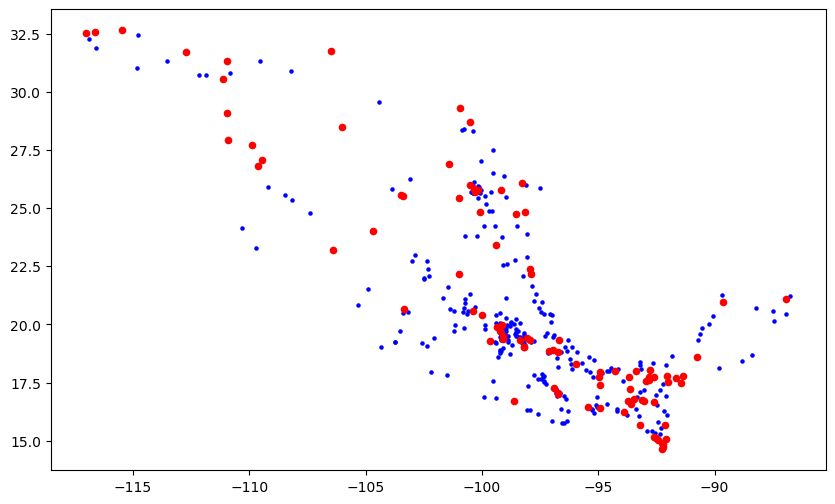

In [391]:
#original distribution 57 facility
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the cities (sub_dfval) in blue
sub_dfval.plot(ax=ax, color='blue', markersize=5, label='Cities')

# Plot the facilities in red
facilities.plot(ax=ax, color='red', markersize=20, label='Facilities')

# Add a legend
#plt.legend()

# Add a title
#plt.title('87')

# Show the plot
plt.show()


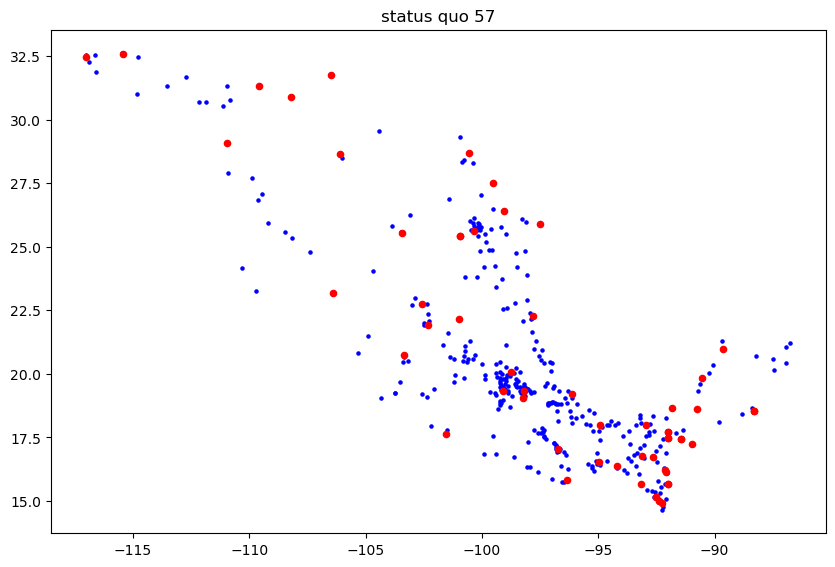

In [345]:
#original distribution 57 facility
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the cities (sub_dfval) in blue
sub_dfval.plot(ax=ax, color='blue', markersize=5, label='Cities')

# Plot the facilities in red
gdf_inm.plot(ax=ax, color='red', markersize=20, label='Facilities')

# Add a legend
#plt.legend()

# Add a title
plt.title('status quo 57')

# Show the plot
plt.show()



In [135]:
facilities

,geometry
0,POINT (-93.66344 17.76210)
1,POINT (-93.66344 17.76210)
2,POINT (-93.66344 17.76210)
3,POINT (-93.66344 17.76210)
4,POINT (-93.66344 17.76210)
...,...
109,POINT (-97.10601 18.84974)
110,POINT (-109.64201 26.82484)
111,POINT (-109.90221 27.71198)
112,POINT (-98.60083 16.73083)


In [171]:
sub_dfval

,Unnamed: 0,nommun,cvemun,estado,region,id_poligon,eventos,inm_30km,sc_30km,geometry,buffer
72,250,"Mazatlan, Sinaloa",28010.0,Sinaloa,Pacifico,PG761,976.0,1,4,POINT (-106.42084 23.20358),"POLYGON ((-106.14953 23.20358, -106.15083 23.1..."
73,382,"Merida, Yucatan",NaN,Yucatan,Sur,PG1694,930.0,1,7,POINT (-89.62374 20.96708),"POLYGON ((-89.35243 20.96708, -89.35374 20.940..."
74,71,"Saltillo, Coahuila",25012.0,Coahuila,Centro,PG1077,925.0,1,64,POINT (-100.99275 25.42304),"POLYGON ((-100.72144 25.42304, -100.72275 25.3..."
75,285,"Altamira, Tamaulipas",26029.0,Tamaulipas,Golfo,PG1228,873.0,1,5,POINT (-97.93630 22.39216),"POLYGON ((-97.66499 22.39216, -97.66629 22.365..."
76,239,"Queretaro, Queretaro",31050.0,Queretaro,Centro,PG1109,871.0,0,37,POINT (-100.39022 20.59277),"POLYGON ((-100.11891 20.59277, -100.12022 20.5..."
...,...,...,...,...,...,...,...,...,...,...,...
382,101,"Amecameca, Estado de Mexico",17020.0,Estado de Mexico,Centro,PG1185,NaN,0,1,POINT (-98.70653 19.12003),"POLYGON ((-98.43522 19.12003, -98.43653 19.093..."
383,109,Dolores Hidalgo Cuna de la Independencia Nacio...,NaN,Guanajuato,Centro,PG1070,NaN,0,0,POINT (-100.72596 21.10436),"POLYGON ((-100.45465 21.10436, -100.45595 21.0..."
385,195,"San Miguel Tequixtepec, Oaxaca",NaN,Oaxaca,Sur,PG1261,NaN,0,0,POINT (-97.34056 17.80194),"POLYGON ((-97.06924 17.80194, -97.07055 17.775..."
386,240,"El Marques, Queretaro",NaN,Queretaro,Centro,PG1109,NaN,0,37,POINT (-100.28358 20.73508),"POLYGON ((-100.01227 20.73508, -100.01357 20.7..."


### sc excersice

In [43]:
sub_df_sc

,nommun,cvemun,estado,region,id_poligon,eventos,sc_30km
0,"Tapachula, Chiapas",7089,Chiapas,Sur,PG1530,70665.0,67
1,"Huimanguillo, Tabasco",27008,Tabasco,Sur,PG1456,86684.0,0
2,"Centro, Tabasco",27004,Tabasco,Sur,PG1495,74160.0,7
3,"Acayucan, Veracruz",NaN,Veracruz,Golfo,PG1378,36446.0,25
4,"Tenosique, Tabasco",27017,Tabasco,Sur,PG1572,39620.0,34
...,...,...,...,...,...,...,...
384,"San Juan Huactzinco, Tlaxcala",NaN,Tlaxcala,Centro,PG1224,1.0,45
385,"Amaxac de Guerrero, Tlaxcala",NaN,Tlaxcala,Centro,PG1224,1.0,11
386,"Chicomuselo, Chiapas",13021,Chiapas,Sur,PG1531,NaN,0
387,"Carlos A. Carrillo, Veracruz",7067,Veracruz,Golfo,PG1339,1.0,0
